In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import ast

## Errors and correlations

In [30]:
directories = os.walk(".")
dirs = [i[0] for i in directories]
#dirs = [x for x in dirs if re.match(r'^.\/[a-z]+', x)]
dirs

['.',
 './huckel_electronegativity_global_pair_response',
 './huckel_electronegativity_global_pair_response/.ipynb_checkpoints',
 './huckel_electronegativity_response',
 './huckel_electronegativity_kinetic_response',
 './response',
 './huckel_kinetic',
 './global_pair_response',
 './huckel_global_pair',
 './kinetic_global_pair',
 './huckel_global_pair_response',
 './electronegativity_global_pair_response',
 './huckel',
 './electronegativity_global_pair',
 './huckel_electronegativity_kinetic',
 './electronegativity_kinetic_global_pair_response',
 './huckel_electronegativity_kinetic_global_pair_response',
 './global_pair',
 './kinetic_response',
 './huckel_kinetic_global_pair_response',
 './huckel_electronegativity_global_pair',
 './kinetic',
 './.ipynb_checkpoints',
 './huckel_kinetic_global_pair',
 './huckel_electronegativity',
 './huckel_global_pair_response_ao_energy_levels',
 './huckel_kinetic_response',
 './huckel_electronegativity_kinetic_global_pair',
 './electronegativity_kineti

In [31]:
directories = os.walk(".")

files = [i[2] for i in directories]

rerun_pile = []
output_files = []
test_result_files = []


for enum, f in enumerate(files):
    output_file = []
    
    if re.search(r'^./[a-z]+', dirs[enum]) is None:
        continue

    output_file = [x for x in f if re.search(r'[a-z]\.o\d+', x) is not None]
    df_file = [x for x in f if re.search(r'test_set_results.pkl', x) is not None]
    
    if len(df_file) == 0 or len(output_file) == 0:
        print(f"no test results file for {dirs[enum]}")
        rerun_pile.append(dirs[enum])
        continue
        
    output_files.append(dirs[enum] +"/" + output_file[0])
    test_result_files.append(df_file[0])

no test results file for ./huckel_electronegativity_global_pair_response/.ipynb_checkpoints
no test results file for ./huckel_global_pair_response_ao_energy_levels


In [33]:
training = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : []
}

testing = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : []
}

overfitting_results = {}

for file in output_files:
    print(file)
    lines = list(open(file).readlines())
    
    parameters = [x for x in lines if "optimized parameters:" in x]
    
    if len(parameters) == 0:
        continue
    
    parameters = parameters[0]
    parameters = parameters.replace("optimized parameters:  ", "")
    parameters = parameters.replace("\n", "")
    parameters = ast.literal_eval(parameters)
    #print(parameters)
    
    training["no_params"].append(len(list(parameters.keys())))
    testing["no_params"].append(len(list(parameters.keys())))
    
    training_set_results = lines[-9]
    test_set_results = lines[-6]
    
    #print(training_set_results, end="")
    #print(test_set_results, end="")
    
    training_set_values = re.findall(r'-?\d+.\d+', training_set_results)
    test_set_values = re.findall(r'-?\d+.\d+', test_set_results)
    
    #print(training_set_values)
    #print(test_set_values)
    
    training["RMSE_energies"].append(float(training_set_values[0]))
    training["R2_energies"].append(float(training_set_values[1]))
    training["R2_dipoles"].append(float(training_set_values[2]))
    
    testing["RMSE_energies"].append(float(test_set_values[0]))
    testing["R2_energies"].append(float(test_set_values[1]))
    testing["R2_dipoles"].append(float(test_set_values[2]))
        
    overfitting_results[file.split("/")[1]] = {
        "no. params" : len(list(parameters.keys())),
        "parameters" : list(parameters.keys()),
        "RMSE energy (training)" : float(training_set_values[0]),
        "R2 energy (training)" : float(training_set_values[1]),
        "R2 dipole (training)" : float(training_set_values[2]),
        "obj. func. (training)" : float(training_set_values[0]) + (1-float(training_set_values[1])) + (1-float(training_set_values[2])),
        "RMSE energy (testing)" : float(test_set_values[0]),
        "R2 energy (testing)" : float(test_set_values[1]),
        "R2 dipole (testing)" : float(test_set_values[2]),
        "obj. func. (testing)" : float(test_set_values[0]) + (1-float(test_set_values[1])) + (1-float(test_set_values[2]))
    }
    
overfitting_df = pd.DataFrame.from_dict(overfitting_results, orient='index')
overfitting_df = overfitting_df.sort_values("R2 energy (testing)", ascending=False)
#overfitting_df = overfitting_df.sort_values("R2 dipole (testing)", ascending=False)

overfitting_df

./huckel_electronegativity_global_pair_response/huckel_electronegativity_global_pair_response.o1404190
./huckel_electronegativity_response/huckel_electronegativity_response.o1404195
./huckel_electronegativity_kinetic_response/huckel_electronegativity_kinetic_response.o1404194
./response/response.o1404207
./huckel_kinetic/huckel_kinetic.o1404198
./global_pair_response/global_pair_response.o1404186
./huckel_global_pair/huckel_global_pair.o1404196
./kinetic_global_pair/kinetic_global_pair.o1404204
./huckel_global_pair_response/huckel_global_pair_response.o1404197
./electronegativity_global_pair_response/electronegativity_global_pair_response.o1404179
./huckel/huckel.o1476559
./electronegativity_global_pair/electronegativity_global_pair.o1404178
./huckel_electronegativity_kinetic/huckel_electronegativity_kinetic.o1404191
./electronegativity_kinetic_global_pair_response/electronegativity_kinetic_global_pair_response.o1404182
./huckel_electronegativity_kinetic_global_pair_response/huckel_ele

,no. params,parameters,RMSE energy (training),R2 energy (training),R2 dipole (training),obj. func. (training),RMSE energy (testing),R2 energy (testing),R2 dipole (testing),obj. func. (testing)
huckel_response,6,"[k_s, k_p, k_d, a_x, y_J, y_K]",0.020,0.725,0.141,1.154,0.021,0.699,0.184,1.138
huckel_global_pair_response,11,"[k_s, k_p, k_d, Mg_s, Mg_p, Mg_d, N_s, N_p, a_...",0.020,0.726,0.188,1.106,0.022,0.696,0.193,1.133
huckel_kinetic_global_pair_response,12,"[k_s, k_p, k_d, k_T, Mg_s, Mg_p, Mg_d, N_s, N_...",0.023,0.748,0.172,1.103,0.026,0.672,0.169,1.185
electronegativity_kinetic_response,7,"[k_EN_s, k_EN_p, k_EN_d, k_T, a_x, y_J, y_K]",0.021,0.684,0.210,1.127,0.024,0.652,0.187,1.185
huckel_electronegativity_response,9,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, a_x, y...",0.020,0.721,0.184,1.115,0.024,0.646,0.188,1.190
huckel_electronegativity_kinetic_response,10,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, a...",0.025,0.690,0.185,1.150,0.029,0.618,0.202,1.209
kinetic_response,4,"[k_T, a_x, y_J, y_K]",0.027,0.601,0.140,1.286,0.026,0.609,0.161,1.256
huckel_electronegativity_kinetic_global_pair_response,15,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, M...",0.034,0.725,0.194,1.115,0.039,0.592,0.189,1.258
huckel_kinetic_response,7,"[k_s, k_p, k_d, k_T, a_x, y_J, y_K]",0.033,0.529,0.180,1.324,0.035,0.489,0.176,1.370
huckel_electronegativity_global_pair_response,14,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, Mg_s, ...",0.035,0.718,0.167,1.150,0.044,0.489,0.157,1.398


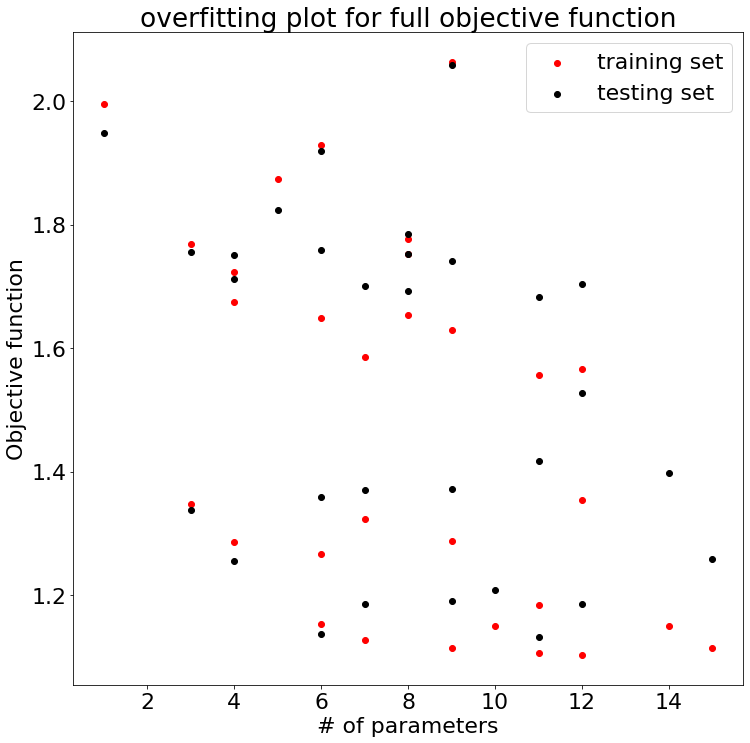

In [45]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots()

training_objective_function = np.array(training["RMSE_energies"]) + (1-np.array(training["R2_energies"])) + (1-np.array(training["R2_dipoles"]))
testing_objective_function = np.array(testing["RMSE_energies"]) + (1-np.array(testing["R2_energies"])) + (1-np.array(testing["R2_dipoles"]))

ax.scatter(training["no_params"], training_objective_function, color='red', label="training set")
ax.scatter(testing["no_params"], testing_objective_function, color='black', label="testing set")

ax.set_xlabel("# of parameters")
ax.set_ylabel("Objective function")
ax.set_title("overfitting plot for full objective function")
ax.legend()
fig.set_size_inches(12,12)
fig.savefig("overfitting_full_obj_func.png")

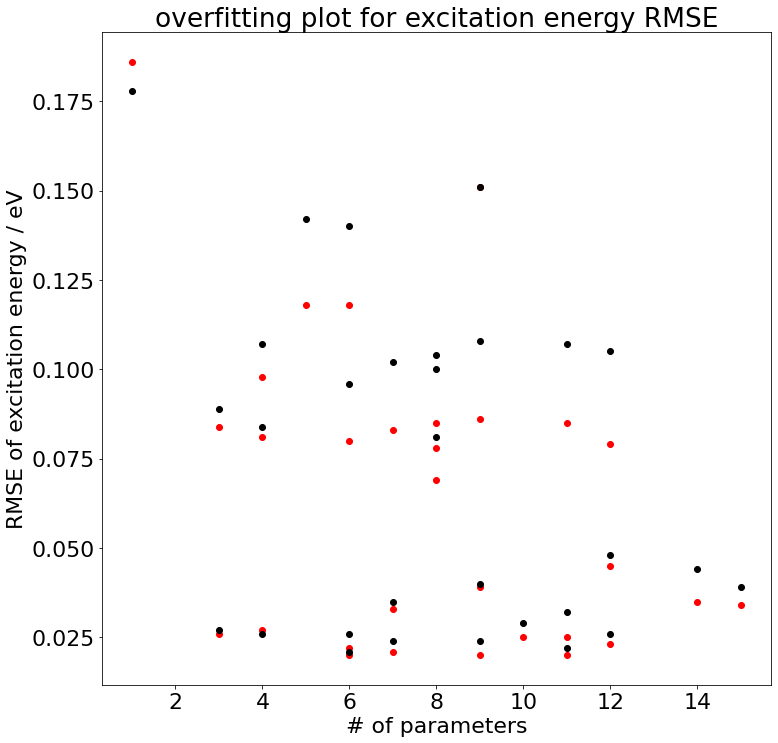

In [46]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["RMSE_energies"], color='red')
ax.scatter(testing["no_params"], testing["RMSE_energies"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("RMSE of excitation energy / eV")
ax.set_title("overfitting plot for excitation energy RMSE")
fig.set_size_inches(12,12)
fig.savefig("overfitting_energy_RMSE.png")

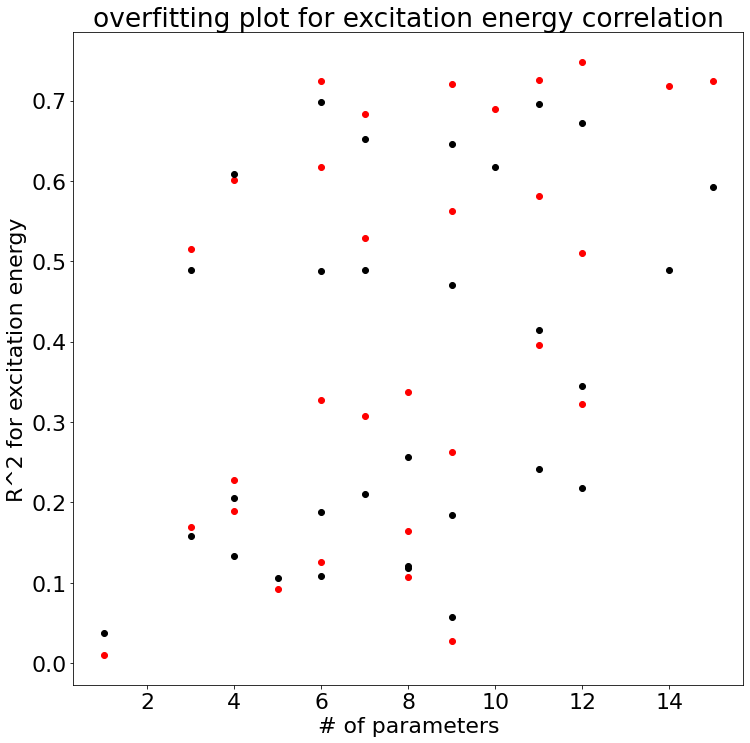

In [47]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["R2_energies"], color='red')
ax.scatter(testing["no_params"], testing["R2_energies"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("R^2 for excitation energy")
ax.set_title("overfitting plot for excitation energy correlation")

fig.set_size_inches(12,12)
fig.savefig("overfitting_energy_corr.png")

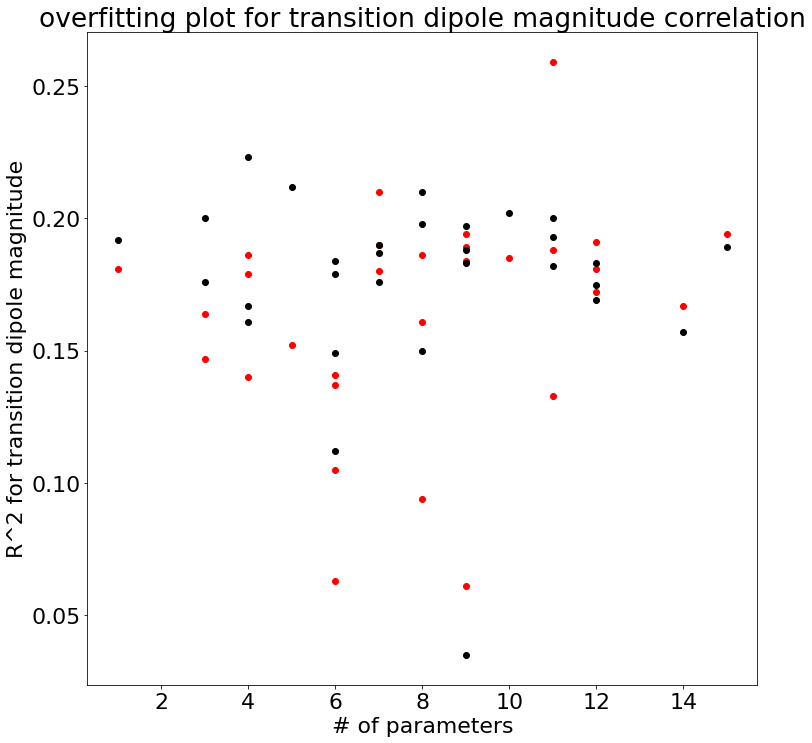

In [50]:
fig, ax = plt.subplots()

ax.scatter(training["no_params"], training["R2_dipoles"], color='red')
ax.scatter(testing["no_params"], testing["R2_dipoles"], color='black')

ax.set_xlabel("# of parameters")
ax.set_ylabel("R^2 for transition dipole magnitude")
ax.set_title("overfitting plot for transition dipole magnitude correlation")

fig.set_size_inches(12,12)
fig.savefig("overfitting_tdm_corr.png")

In [38]:
def get_df(file_name):
    df = pkl.load(open(f"{file_name}/test_set_results.pkl", 'rb'))
    
    return df

huckel_global_pair_response_df = get_df("huckel_global_pair_response")

In [39]:
huckel_global_pair_response_df.corr()

,tddft_energy,xtb_energy,energy_error,Z_values,dipole_errors,tddft_angle_errors,xtb_angle_errors
tddft_energy,1.000000,0.779657,-0.111547,-0.111547,0.031790,-0.052288,-0.175803
xtb_energy,0.779657,1.000000,0.535331,0.535331,0.100789,-0.035761,-0.056269
energy_error,-0.111547,0.535331,1.000000,1.000000,0.117068,0.013776,0.147832
Z_values,-0.111547,0.535331,1.000000,1.000000,0.117068,0.013776,0.147832
dipole_errors,0.031790,0.100789,0.117068,0.117068,1.000000,-0.078642,-0.124473
tddft_angle_errors,-0.052288,-0.035761,0.013776,0.013776,-0.078642,1.000000,0.449336
xtb_angle_errors,-0.175803,-0.056269,0.147832,0.147832,-0.124473,0.449336,1.000000


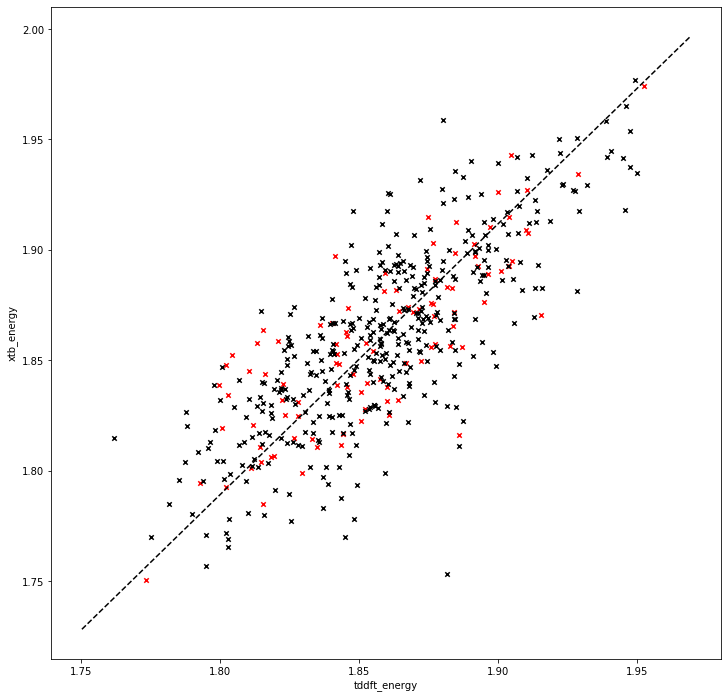

In [21]:
def energy_scatter(df):
    test_rows = df.loc[df["set"] == "test"]
    training_rows = df.loc[df["set"] == "training"]

    fig, ax = plt.subplots()

    test_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='black', ax=ax)
    training_rows.plot.scatter("tddft_energy", "xtb_energy", marker='x', color='red', ax=ax)
    
    fig.set_size_inches(12, 12)
    
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    ax.plot([xmin, xmax], [ymin, ymax], color='black', linestyle='--')
    
    plt.show()
    
energy_scatter(huckel_global_pair_response_df)

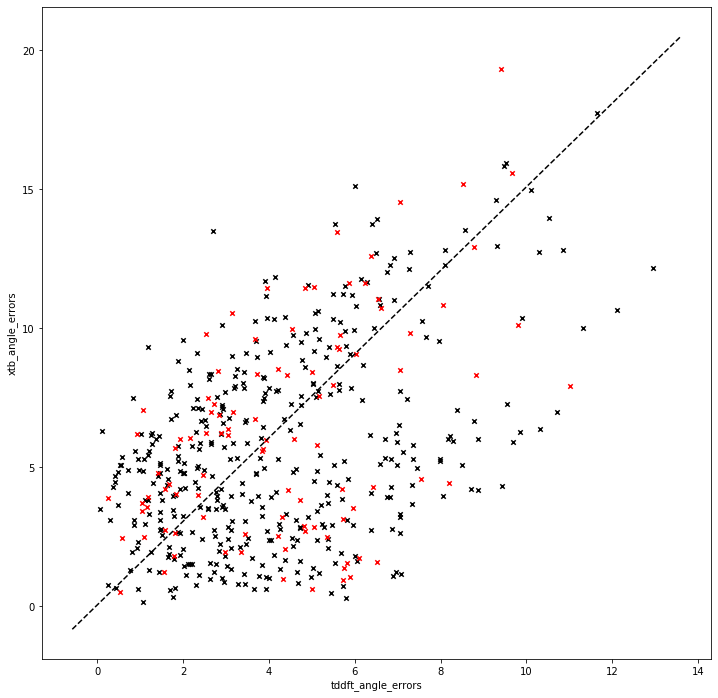

In [27]:
def angles_scatter(df):
    test_df = df.loc[df["set"] == "test"]
    training_df = df.loc[df["set"] == "training"]
    
    fig, ax = plt.subplots()
    
    test_df.plot.scatter("tddft_angle_errors", "xtb_angle_errors", marker='x', color='black', ax=ax)
    training_df.plot.scatter("tddft_angle_errors", "xtb_angle_errors", marker='x', color='red', ax=ax)
    
    fig.set_size_inches(12, 12)
    
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    ax.plot([xmin, xmax], [ymin, ymax], color='black', linestyle='--')
    
    plt.show()

    
angles_scatter(huckel_global_pair_response_df)
    

slope 0.6799222158583093
intercept 2.653656573581903
r^2 0.18388391574746124


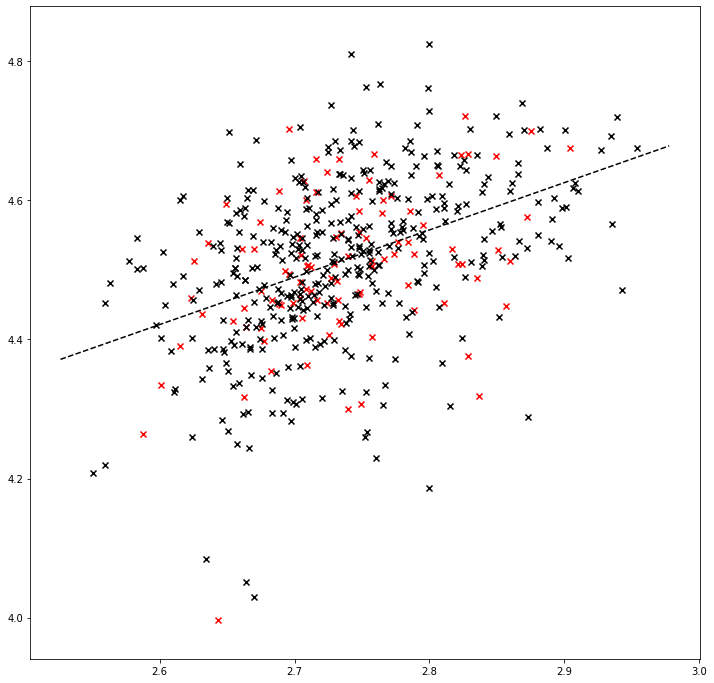

In [103]:
def mag(vec):
    return np.linalg.norm(np.array(vec))

def mags_scatter(df):
    training_df = df.loc[df["set"] == "training"]
    test_df = df.loc[df["set"] == "test"]
    
    train_xtb_mags = []
    train_tddft_mags = []

    test_xtb_mags = []
    test_tddft_mags = []
    
    for index, row in training_df.iterrows():
        train_xtb_mags.append(mag(row["xtb_dipoles"]))
        train_tddft_mags.append(mag(row["tddft_dipoles"]))
    
    for index, row in test_df.iterrows():
        test_xtb_mags.append(mag(row["xtb_dipoles"]))
        test_tddft_mags.append(mag(row["tddft_dipoles"]))
        
    fig, ax = plt.subplots()

    from scipy.stats import linregress
    slope, intercept, r_value, _, _ = linregress(test_tddft_mags, test_xtb_mags)
    print("slope", slope)
    print("intercept", intercept)
    print("r^2", r_value**2)
    
    ax.scatter(train_tddft_mags, train_xtb_mags, color='red', marker='x')
    ax.scatter(test_tddft_mags, test_xtb_mags, color='black', marker='x')
    
    
    fig.set_size_inches(12, 12)
    
    xmin, xmax = ax.get_xlim()
    
    x_values = np.linspace(xmin, xmax, 100)
    best_fit = lambda x : intercept + slope * x
    ax.plot(x_values, best_fit(x_values), linestyle="--", color='black')
    
    
    ymin, ymax = ax.get_ylim()
    
    #ax.plot([xmin, xmax], [ymin, ymax], color='black', linestyle='--')
    
    plt.show()

    
mags_scatter(huckel_global_pair_response_df)
    

## Weighting search

In [80]:
directories = os.walk(".")

files = [i[2] for i in directories]

just_dipole_outputs = []
just_dipole_test_results = []

for enum, f in enumerate(files):
    if re.search(r'^./[a-z]+', dirs[enum]) is None:
        continue
    
    name = dirs[enum][2:]
    output_file = [x for x in f if re.search(fr'{name}.*.out', x) is not None]
    output_file = [x for x in output_file if re.search(r'.*a_0.0_b_0.0_c_1.0.*', x) is not None]
    
    df_file = [x for x in f if re.search(fr'{name}.*.pkl', x) is not None]
    df_file = [x for x in df_file if re.search(r'.*a_0.0_b_0.0_c_1.0.*', x) is not None]

    just_dipole_outputs.append(dirs[enum] +"/" + output_file[0])
    just_dipole_test_results.append(df_file[0])
    
print(just_dipole_outputs)

['./huckel_electronegativity_global_pair_response/huckel_electronegativity_global_pair_response_a_0.0_b_0.0_c_1.0.out', './huckel_electronegativity_response/huckel_electronegativity_response_a_0.0_b_0.0_c_1.0.out', './huckel_electronegativity_kinetic_response/huckel_electronegativity_kinetic_response_a_0.0_b_0.0_c_1.0.out', './response/response_a_0.0_b_0.0_c_1.0.out', './huckel_kinetic/huckel_kinetic_a_0.0_b_0.0_c_1.0.out', './global_pair_response/global_pair_response_a_0.0_b_0.0_c_1.0.out', './huckel_global_pair/huckel_global_pair_a_0.0_b_0.0_c_1.0.out', './kinetic_global_pair/kinetic_global_pair_a_0.0_b_0.0_c_1.0.out', './huckel_global_pair_response/huckel_global_pair_response_a_0.0_b_0.0_c_1.0.out', './electronegativity_global_pair_response/electronegativity_global_pair_response_a_0.0_b_0.0_c_1.0.out', './huckel/huckel_a_0.0_b_0.0_c_1.0.out', './electronegativity_global_pair/electronegativity_global_pair_a_0.0_b_0.0_c_1.0.out', './huckel_electronegativity_kinetic/huckel_electronegat

In [95]:
training = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : [],
    "obj. func." : []
}

testing = { 
    "no_params" : [],
    "RMSE_energies" : [],
    "R2_energies" : [],
    "R2_dipoles" : [],
    "obj. func." : []
}

overfitting_results = {}

for file in just_dipole_outputs:
    lines = list(open(file).readlines())
    
    parameters = [x for x in lines if "optimized parameters:" in x]
    parameters = parameters[0]
    parameters = parameters.replace("optimized parameters: ", "")
    parameters = parameters.replace("\n", "")
    parameters = ast.literal_eval(parameters)

    training["no_params"].append(len(list(parameters.keys())))
    testing["no_params"].append(len(list(parameters.keys())))
    
    training_set_results = lines[-10]
    test_set_results = lines[-7]
    
    #print(training_set_results, end="")
    #print(test_set_results, end="")
    
    training_set_values = re.findall(r'-?\d+.\d+', training_set_results)
    test_set_values = re.findall(r'-?\d+.\d+', test_set_results)
    
    #print(training_set_values)
    #print(test_set_values)
    
    training["RMSE_energies"].append(float(training_set_values[0]))
    training["R2_energies"].append(float(training_set_values[1]))
    training["R2_dipoles"].append(float(training_set_values[2]))
    training["obj. func."].append(float(training_set_values[3]))
    
    testing["RMSE_energies"].append(float(test_set_values[0]))
    testing["R2_energies"].append(float(test_set_values[1]))
    testing["R2_dipoles"].append(float(test_set_values[2]))
    testing["obj. func."].append(float(test_set_values[3]))
        
    overfitting_results[file.split("/")[1]] = {
        "no. params" : len(list(parameters.keys())),
        "parameters" : list(parameters.keys()),
        "RMSE energy (training)" : float(training_set_values[0]),
        "R2 energy (training)" : float(training_set_values[1]),
        "R2 dipole (training)" : float(training_set_values[2]),
        "obj. func. (training)" : float(training_set_values[3]),
        "RMSE energy (testing)" : float(test_set_values[0]),
        "R2 energy (testing)" : float(test_set_values[1]),
        "R2 dipole (testing)" : float(test_set_values[2]),
        "obj. func. (testing)" : float(test_set_values[3])
    }
    
overfitting_df = pd.DataFrame.from_dict(overfitting_results, orient='index')
#overfitting_df = overfitting_df.sort_values("R2 energy (testing)", ascending=False)
overfitting_df = overfitting_df.sort_values("R2 dipole (testing)", ascending=False)

overfitting_df

,no. params,parameters,RMSE energy (training),R2 energy (training),R2 dipole (training),obj. func. (training),RMSE energy (testing),R2 energy (testing),R2 dipole (testing),obj. func. (testing)
huckel_global_pair,8,"[k_s, k_p, k_d, Mg_s, Mg_p, Mg_d, N_s, N_p]",0.534,0.071,0.292,0.708326,0.577,0.048,0.270,0.729755
huckel_electronegativity_kinetic_global_pair,12,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, M...",0.362,0.053,0.231,0.768676,0.362,0.061,0.263,0.736617
huckel_electronegativity_kinetic_global_pair_response,15,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, k_T, M...",0.444,0.022,0.290,0.710265,0.451,0.031,0.261,0.738872
huckel_electronegativity_global_pair,11,"[k_s, k_p, k_d, k_EN_s, k_EN_p, k_EN_d, Mg_s, ...",3.665,0.123,0.309,0.690860,3.686,0.075,0.246,0.754368
global_pair,5,"[Mg_s, Mg_p, Mg_d, N_s, N_p]",0.307,0.125,0.210,0.789918,0.312,0.113,0.223,0.777340
kinetic,1,[k_T],1.179,0.024,0.195,0.804570,1.170,0.051,0.218,0.781999
kinetic_response,4,"[k_T, a_x, y_J, y_K]",1.179,0.024,0.195,0.804570,1.170,0.051,0.218,0.781999
response,3,"[a_x, y_J, y_K]",1.261,0.022,0.195,0.805044,1.250,0.043,0.217,0.783363
electronegativity_global_pair,8,"[k_EN_s, k_EN_p, k_EN_d, Mg_s, Mg_p, Mg_d, N_s...",0.404,0.077,0.227,0.773073,0.399,0.094,0.216,0.783943
electronegativity_response,6,"[k_EN_s, k_EN_p, k_EN_d, a_x, y_J, y_K]",2.244,0.004,0.207,0.792740,2.233,0.017,0.213,0.786931
